<a href="https://www.kaggle.com/code/rashidulhaqyousafzai/data-analysis-linear-regression-to-e-commerce?scriptVersionId=137121148" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split,cross_val_score
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/focusing-on-mobile-app-or-website/Ecommerce Customers


## **Dataset Information**
This [Dataset](https://www.kaggle.com/datasets/kolawale/focusing-on-mobile-app-or-website) is of a company sales. And they want decide wether to focus on their website or app for improving the sales.

## **Introduction**
This dataset contain sales data of clothing shop. And they want to decide on the basis of the data wether to focus on their website or app.

In [2]:
df = pd.read_csv("/kaggle/input/focusing-on-mobile-app-or-website/Ecommerce Customers")
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


## **Let's analyse our data**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


As we have seen from the info method that our dataset contain 7 columns, 3 of which are objects and we have no null values in all of the columns.

In [4]:
df.describe(include='all') # include all will give us the description of all the columns includeing objects datatype column

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500,500,500,500.000000,500.000000,500.000000,500.000000,500.000000
unique,500,500,138,NaN,NaN,NaN,NaN,NaN
top,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",SlateBlue,NaN,NaN,NaN,NaN,NaN
freq,1,1,7,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,33.053194,12.052488,37.060445,3.533462,499.314038
std,NaN,NaN,NaN,0.992563,0.994216,1.010489,0.999278,79.314782
min,NaN,NaN,NaN,29.532429,8.508152,33.913847,0.269901,256.670582
25%,NaN,NaN,NaN,32.341822,11.388153,36.349257,2.930450,445.038277
50%,NaN,NaN,NaN,33.082008,11.983231,37.069367,3.533975,498.887875
75%,NaN,NaN,NaN,33.711985,12.753850,37.716432,4.126502,549.313828


> As we have seen that email, address and avatar have unique values and they don't gives us and info so we will drop them.

In [5]:
df = df.drop(["Email","Address","Avatar"],axis=1)

In [6]:
df.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


## **Outliers analysis in dataset**
The outliers effect has a great on the overall decision. so we will remove the outliers from dataset for more accurate decision.

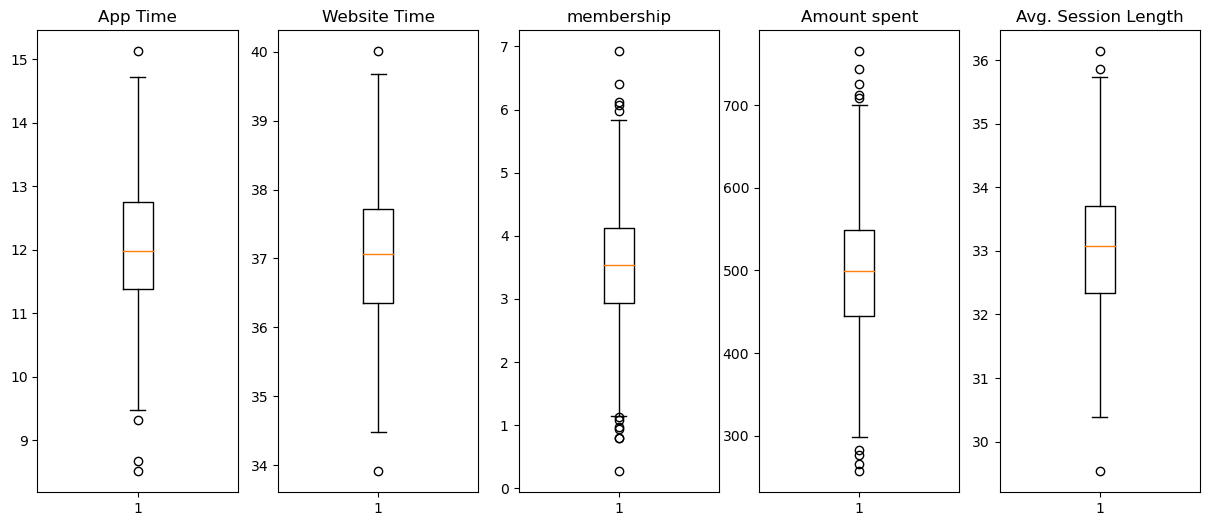

In [7]:
fig,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5,figsize=(15,6))
ax1.boxplot(df["Time on App"])
ax1.set_title("App Time")
ax2.boxplot(df["Time on Website"])
ax2.set_title("Website Time")
ax3.boxplot(df["Length of Membership"])
ax3.set_title("membership")
ax4.boxplot(df["Yearly Amount Spent"])
ax4.set_title("Amount spent")
ax5.boxplot(df["Avg. Session Length"])
ax5.set_title("Avg. Session Length")
plt.show()

> As we can see all of the columns has outliers so we will remove them

In [8]:
# shape before removing outliers
df.shape

(500, 5)

In [9]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df = df[
    ~(
        (df<lower)|
        (df>upper)
    )
]
df.shape

(500, 5)

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


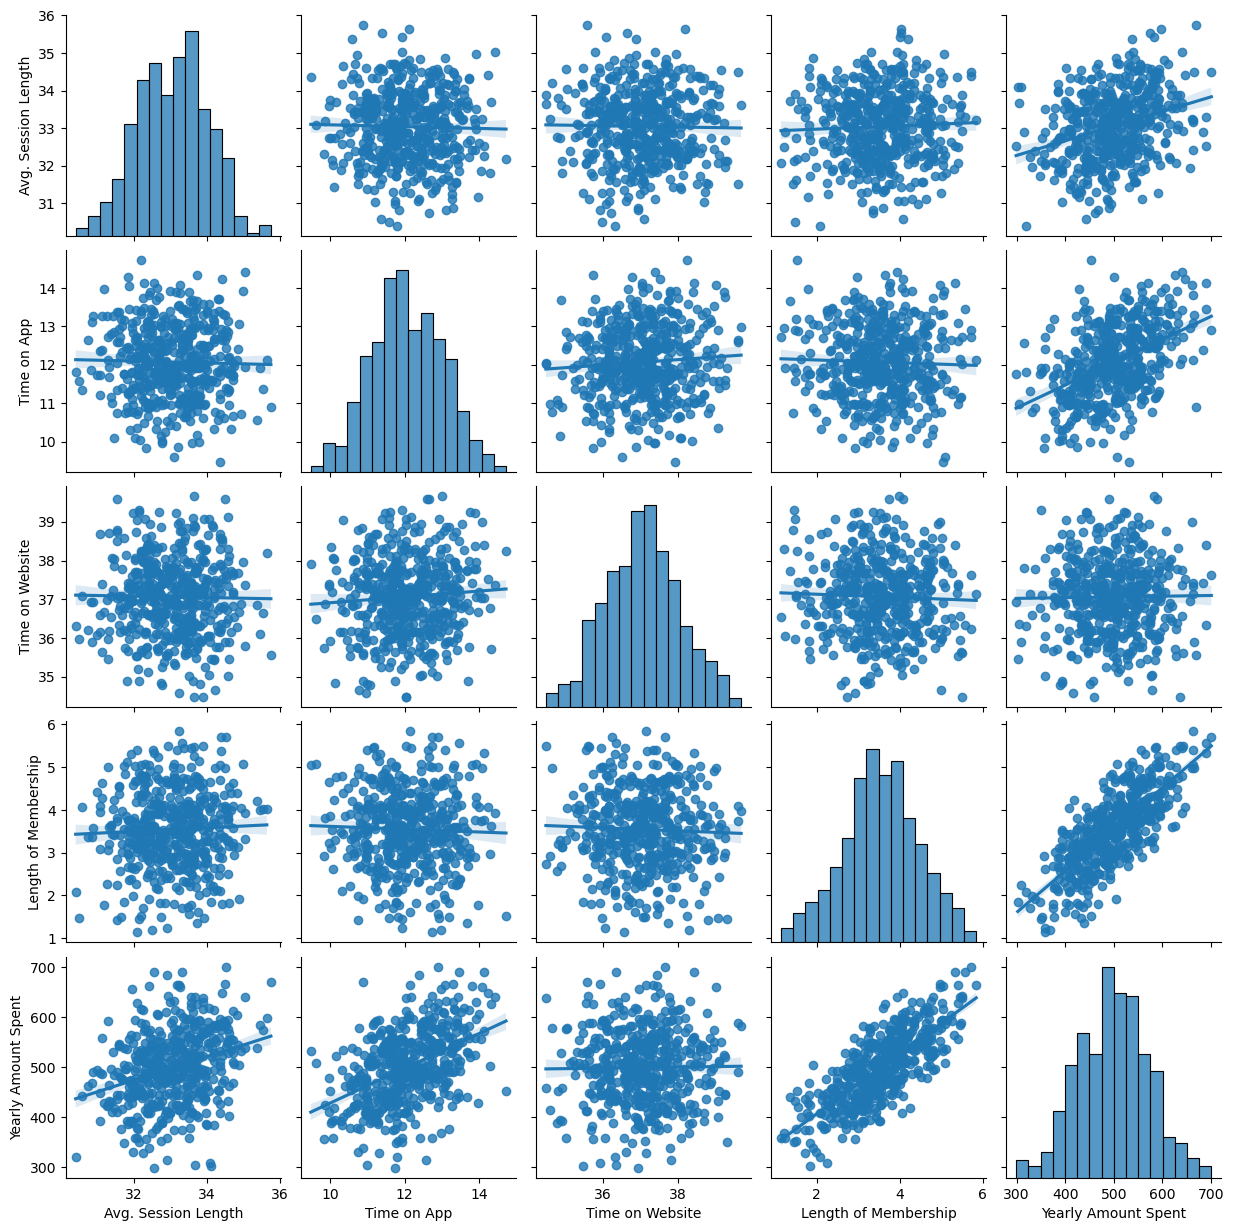

In [10]:
sns.pairplot(df,kind="reg")

In [11]:
df.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


## **Analyse Yearly amount spent with time on website and app** 

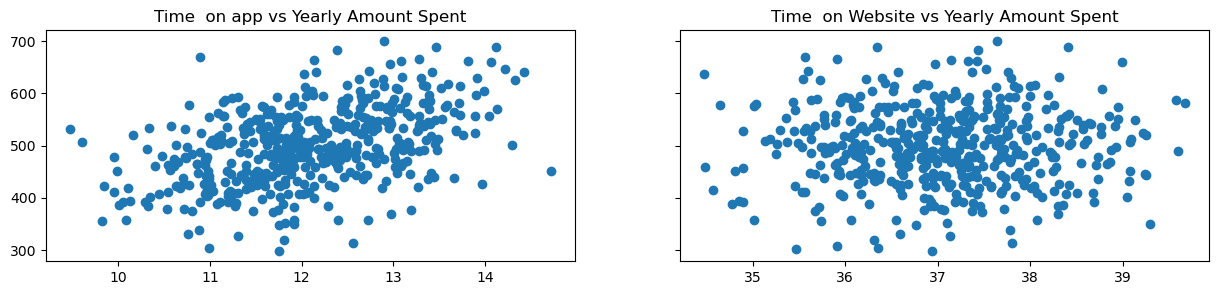

In [12]:
fig,(ax1,ax2) = plt.subplots(1,2,sharey=True,figsize=(15,3))
ax1.scatter(df["Time on App"],df["Yearly Amount Spent"])
ax1.set_title("Time  on app vs Yearly Amount Spent")
ax2.scatter(df["Time on Website"],df["Yearly Amount Spent"])
ax2.set_title("Time  on Website vs Yearly Amount Spent")
plt.show()

> As we can see the time on app is linearly related to amount spent yearly

## **Correlation between data**

In [13]:
corr = df.corr()
corr

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.023887,-0.016820,0.043538,0.301824
Time on App,-0.023887,1.000000,0.072572,-0.034794,0.455212
Time on Website,-0.016820,0.072572,1.000000,-0.038329,0.013894
Length of Membership,0.043538,-0.034794,-0.038329,1.000000,0.765482
Yearly Amount Spent,0.301824,0.455212,0.013894,0.765482,1.000000


> The coorelation of Yearly amount spent with time on app and time on website is 0.45 and 0.013

<Axes: >

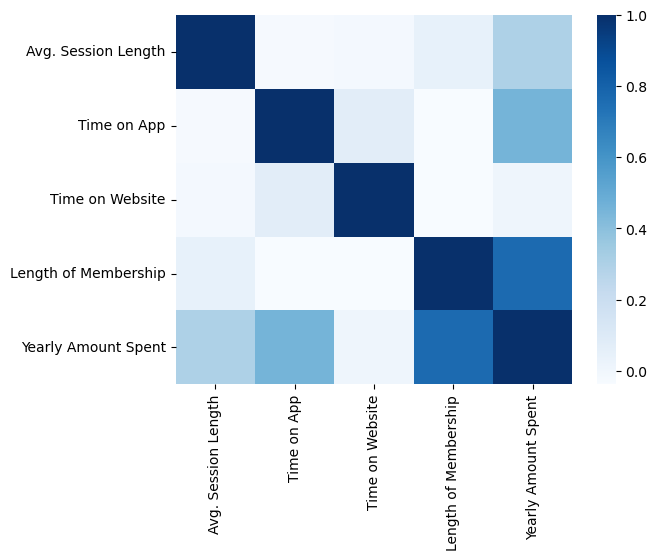

In [14]:
sns.heatmap(corr,cmap="Blues")

## **Findings of Analysis**
> As we can see that the yearly amount spent and time on app has greater correlation so the company should focus on its app to improve their sales.

## **Single Linear Regression**
In this section we will first analyse the relationship of each column with final output and the use that column as feature vector x and yearly amount spent as final output.

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


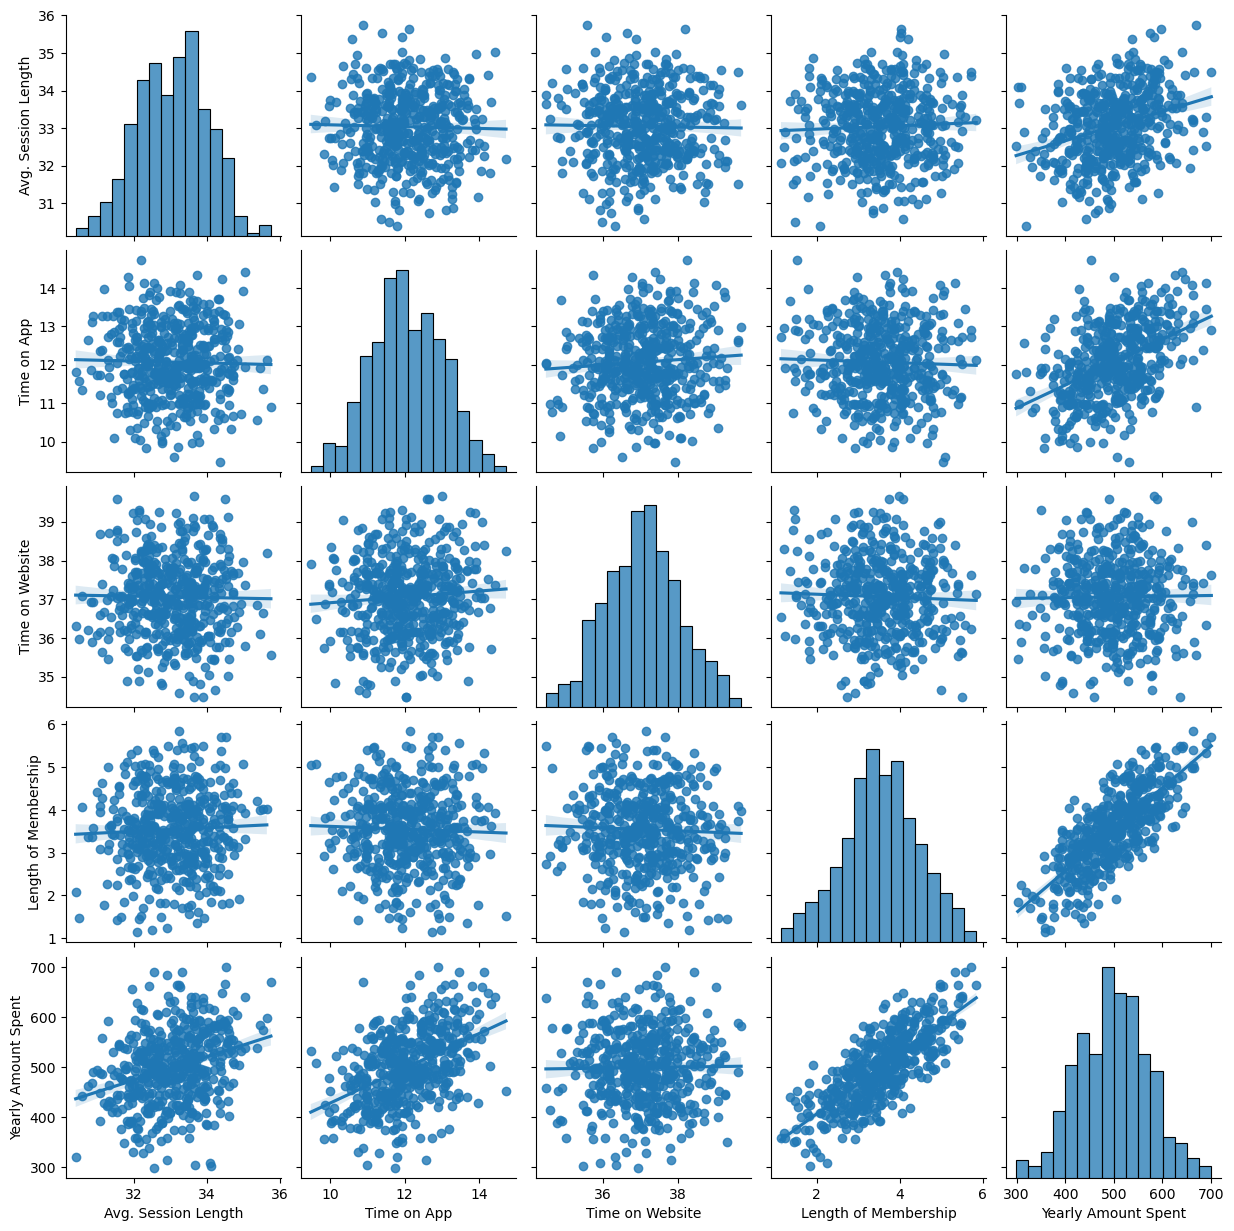

In [15]:
sns.pairplot(df,kind="reg")

As we have seen yearly amount spent and Length of membership has linear relationship.

In [16]:
df =df.dropna()
X= np.array(df["Length of Membership"]).reshape(-1,1)
X.shape

(476, 1)

In [17]:
y = np.array(df[['Yearly Amount Spent']])
y.shape

(476, 1)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=32,test_size=0.3)

In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(333, 1)
(143, 1)
(333, 1)
(143, 1)


In [20]:
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)
print("Bias is ",linear_regression.intercept_)
print("Co-efficient is ",linear_regression.coef_)

Bias is  [292.63711521]
Co-efficient is  [[58.93013553]]


In [21]:
prediction = linear_regression.predict(X_test)

In [22]:
mean_squared_error(y_test,prediction)

1886.803712249171

In [23]:
mean_absolute_error(y_test,prediction)

34.44165167677709

## **Multiple Linear Regression**

In [24]:
X= np.array(df.drop(['Yearly Amount Spent'],axis=1))
X.shape

(476, 4)

In [25]:
y.shape

(476, 1)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=32,test_size=0.3)

In [27]:
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)
print("Bias is ",linear_regression.intercept_)
print("Co-efficient is ",linear_regression.coef_)

Bias is  [-1047.99936939]
Co-efficient is  [[25.65419641 38.78367116  0.39479032 61.40285577]]


In [28]:
prediction = linear_regression.predict(X_test)

In [29]:
mean_squared_error(y_test,prediction)

86.75645346292518

In [30]:
mean_absolute_error(y_test,prediction)

7.321986057988188